### 1. chardet 설치
텍스트 파일의 인코딩을 자동감지 되도록 설정

In [ ]:
!pip install chardet

### 2. Google Drive 마운트 및 경로 설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 3. 데이터셋 압축 해제

MAC유저

In [ ]:
import zipfile
import os

def extract_and_fix_encoding(zip_file_path, extract_to):
    # ZIP 파일 열기
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for member in zip_ref.namelist():
            # 파일 이름을 인코딩 문제 해결
            try:
                # 먼저 UTF-8로 시도
                decoded_name = member.encode('cp437').decode('utf-8')
            except UnicodeDecodeError:
                # UTF-8이 실패하면 cp437로 해석
                decoded_name = member.encode('utf-8').decode('cp437')

            # 압축 해제할 파일의 경로 생성
            member_path = os.path.join(extract_to, decoded_name)

            # 디렉토리인 경우 디렉토리 생성
            if member.endswith('/'):
                os.makedirs(member_path, exist_ok=True)
            else:
                # 파일인 경우 압축 해제
                os.makedirs(os.path.dirname(member_path), exist_ok=True)
                with zip_ref.open(member) as source, open(member_path, 'wb') as target:
                    target.write(source.read())
        print(f'{zip_file_path} 압축 해제 완료.')

# 압축 파일이 있는 폴더 경로
zip_folder = '/content/drive/MyDrive/YOLO/k-food'

# 압축을 풀어야 할 경로
extract_path = '/content/YOLO/dataset'

# ZIP 파일들 목록
zip_files = ['한혜승.zip', '김지현.zip', '김수명.zip']

# 각각의 ZIP 파일 압축 해제
for zip_file in zip_files:
    zip_file_path = os.path.join(zip_folder, zip_file)
    extract_and_fix_encoding(zip_file_path, extract_path)

print("모든 압축 파일 해제 및 인코딩 문제 해결이 완료되었습니다.")

/content/drive/MyDrive/YOLO/k-food/한혜승.zip 압축 해제 완료.
/content/drive/MyDrive/YOLO/k-food/김지현.zip 압축 해제 완료.
/content/drive/MyDrive/YOLO/k-food/김수명.zip 압축 해제 완료.
모든 압축 파일 해제 및 인코딩 문제 해결이 완료되었습니다.


window유저

In [ ]:
import zipfile
import os

# 압축 해제 함수 (인코딩 문제 없음)
def extract_zip(zip_file_path, extract_to):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
        print(f'{zip_file_path} 압축 해제 완료.')

# 압축 파일이 있는 폴더 경로
zip_folder = '/content/drive/MyDrive/YOLO/k-food'

# 압축을 풀어야 할 경로
extract_path = '/content/YOLO/dataset'

# 압축 파일 목록 (인코딩 문제 없는 파일)
zip_files = ['손민지.zip', '김예지.zip']

# 각각의 ZIP 파일 압축 해제
for zip_file in zip_files:
    zip_file_path = os.path.join(zip_folder, zip_file)
    extract_zip(zip_file_path, extract_path)

print("압축 해제가 완료되었습니다.")

/content/drive/MyDrive/YOLO/k-food/손민지.zip 압축 해제 완료.
/content/drive/MyDrive/YOLO/k-food/김예지.zip 압축 해제 완료.
압축 해제가 완료되었습니다.


### 4. 데이터셋 정리

In [ ]:
import os
import shutil

# 중간 폴더 경로
middle_folder = '/content/YOLO/dataset/손민지'
# 상위 폴더 경로
parent_folder = '/content/YOLO/dataset'

# 중간 폴더 내의 모든 하위 폴더 및 파일을 상위 폴더로 이동
for item in os.listdir(middle_folder):
    item_path = os.path.join(middle_folder, item)
    new_path = os.path.join(parent_folder, item)

    # 같은 이름의 폴더나 파일이 상위 폴더에 이미 존재할 경우 삭제 후 이동
    if os.path.exists(new_path):
        if os.path.isdir(new_path):
            shutil.rmtree(new_path)  # 폴더일 경우 삭제
        else:
            os.remove(new_path)  # 파일일 경우 삭제

    shutil.move(item_path, parent_folder)  # 중간 폴더에서 상위 폴더로 이동

# 중간 폴더 삭제
shutil.rmtree(middle_folder)

print("손민지 폴더가 삭제되고 하위 폴더들이 dataset 바로 밑에 이동되었습니다.")

손민지 폴더가 삭제되고 하위 폴더들이 dataset 바로 밑에 이동되었습니다.


In [ ]:
import os
import shutil

# 중간 폴더 경로
middle_folder = '/content/YOLO/dataset/김수명'
# 상위 폴더 경로
parent_folder = '/content/YOLO/dataset'

# 중간 폴더 내의 모든 하위 폴더 및 파일을 상위 폴더로 이동
for item in os.listdir(middle_folder):
    item_path = os.path.join(middle_folder, item)
    new_path = os.path.join(parent_folder, item)

    # 같은 이름의 폴더나 파일이 상위 폴더에 이미 존재할 경우 삭제 후 이동
    if os.path.exists(new_path):
        if os.path.isdir(new_path):
            shutil.rmtree(new_path)  # 폴더일 경우 삭제
        else:
            os.remove(new_path)  # 파일일 경우 삭제

    shutil.move(item_path, parent_folder)  # 중간 폴더에서 상위 폴더로 이동

# 중간 폴더 삭제
shutil.rmtree(middle_folder)

print("김수명 폴더가 삭제되고 하위 폴더들이 dataset 바로 밑에 이동되었습니다.")

김수명 폴더가 삭제되고 하위 폴더들이 dataset 바로 밑에 이동되었습니다.


MAC유저의 MACOSX 폴더 삭제

In [ ]:
import os
import shutil

# _MACOSX 폴더 삭제 함수
def delete_macosx_folders(directory):
    for root, dirs, files in os.walk(directory):
        for dir_name in dirs:
            if dir_name == '__MACOSX':
                macosx_path = os.path.join(root, dir_name)
                print(f'찾은 _MACOSX 폴더: {macosx_path}')
                try:
                    shutil.rmtree(macosx_path, ignore_errors=True)  # 강제로 삭제
                    print(f'{macosx_path} 삭제 완료.')
                except Exception as e:
                    print(f'{macosx_path} 삭제 중 오류 발생: {e}')

# 압축 해제된 폴더 경로
dataset_directory = '/content/YOLO/dataset'

# _MACOSX 폴더 삭제 실행
delete_macosx_folders(dataset_directory)

찾은 _MACOSX 폴더: /content/YOLO/dataset/__MACOSX
/content/YOLO/dataset/__MACOSX 삭제 완료.


### 5. 데이터셋 확인

In [ ]:
!ls -a /content/YOLO/dataset

송편	수제비	  애호박볶음	      갈치구이	    동태찌개  비빔밥	    제육볶음
보쌈	비빔냉면  고등어조림	      감자채볶음    된장찌개  삼겹살	    조개구이
쫄면	배추김치  오이소박이	      감자탕	    두부김치  삼계탕	    족발
파전	간장게장  시금치나물	      갓김치	    등갈비    소세지볶음    주꾸미볶음
식혜	갈치조림  깻잎장아찌	      고등어구이    떡갈비    수육	    주먹밥
수정과	김치찌개  고사리나물	      곱창구이	    떡국      순대	    찜닭
호박전	잔치국수  미역줄기볶음	      김밥	    떡볶이    순두부찌개    추어탕
무생채	총각김치  메추리알장조림      김치볶음밥    만두국    숯불닭갈비    칼국수
물냉면	숙주나물  .		      김치찜	    매운무국  시래기국	    콩국수
막국수	감자조림  ..		      김치콩나물국  매운탕    약과	    콩나물국
호박죽	연근조림  .DS_Store	      꽈리고추무침  멸치볶음  약식	    콩나물무침
김치전	양념게장  .ipynb_checkpoints  누룽지	    무국      어묵볶음	    콩자반
감자전	두부조림  LA갈비	      닭갈비	    미역국    오징어채볶음  편육
깍두기	가지볶음  갈비구이	      닭계장	    백김치    육회	    한ᄀ

In [ ]:
import os

#경로 설정
dataset_directory = '/content/YOLO/dataset'

#폴더 개수 확인
def count_folders(directory):
  folder_count = 0
  for item in os.listdir(directory):
    if os.path.isdir(os.path.join(directory, item)):
      folder_count += 1
  return folder_count

#폴더 개수 출력
folder_count = count_folders(dataset_directory)
print(f'폴더 개수: {folder_count}')

폴더 개수: 107


### 6. 데이터셋 분할
8:2 비율로 학습/검증 데이터 나눔

In [ ]:
import os
import shutil
import random

# 이미지와 라벨 파일들이 들어있는 경로
dataset_dir = '/content/YOLO/dataset'
output_dir = '/content/YOLO/yolo_dataset'

# train과 val 데이터가 저장될 폴더 경로
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')

# 각 폴더가 없으면 생성
os.makedirs(train_dir + '/images', exist_ok=True)
os.makedirs(train_dir + '/labels', exist_ok=True)
os.makedirs(val_dir + '/images', exist_ok=True)
os.makedirs(val_dir + '/labels', exist_ok=True)

# 데이터 분할 비율 (예: 80%는 train, 20%는 val)
split_ratio = 0.8

# 중분류 폴더 순회
for category in os.listdir(dataset_dir):
    category_path = os.path.join(dataset_dir, category)

    # 불필요한 폴더 제외
    if os.path.isdir(category_path) and category != '.ipynb_checkpoints':
        images_path = os.path.join(category_path, 'images')
        labels_path = os.path.join(category_path, 'labels')

        # 이미지와 라벨 폴더가 존재하는지 확인
        if os.path.exists(images_path) and os.path.exists(labels_path):
            # 이미지 파일 리스트 가져오기
            images = os.listdir(images_path)
            images = [img for img in images if img.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]  # 대소문자 구분 없이 이미지 파일만 선택
            random.shuffle(images)

            # 데이터 분할
            train_size = int(len(images) * split_ratio)
            train_images = images[:train_size]
            val_images = images[train_size:]

            # 짝이 맞는 파일만 복사
            def copy_files(image_list, destination_images, destination_labels):
                for img in image_list:
                    label_file = img.replace('.jpg', '.txt').replace('.jpeg', '.txt').replace('.png', '.txt').replace('.bmp', '.txt')
                    if os.path.exists(os.path.join(labels_path, label_file)):  # 라벨 파일이 있는 경우에만
                        shutil.copy(os.path.join(images_path, img), os.path.join(destination_images, img))
                        shutil.copy(os.path.join(labels_path, label_file), os.path.join(destination_labels, label_file))
                    else:
                        print(f"Warning: {img}에 대한 라벨 파일이 존재하지 않습니다.")

            # train 데이터 복사
            copy_files(train_images, train_dir + '/images', train_dir + '/labels')

            # val 데이터 복사
            copy_files(val_images, val_dir + '/images', val_dir + '/labels')

print("데이터 분할이 완료되었습니다.")

데이터 분할이 완료되었습니다.


### 7. 데이터 구성 파일 생성
data.yaml 파일을 생성하여 YOLO 모델 학습에 필요한 정보 설정

In [ ]:
# data.yaml 파일을 생성하는 코드
data_yaml = """
train: /content/YOLO/yolo_dataset/train/images  # train 이미지 경로
val: /content/YOLO/yolo_dataset/val/images      # val 이미지 경로

# 클래스 수
nc: 106  # 총 클래스 수

# 클래스 이름
names:
  - 갈비구이
  - 갈치구이
  - 고등어구이
  - 곱창구이
  - 닭갈비
  - 떡갈비
  - 불고기
  - 삼겹살
  - 장어구이
  - 조개구이
  - 떡국
  - 무국
  - 미역국
  - 북엇국
  - 시래기국
  - 콩나물국
  - 콩자반
  - 편육
  - 갓김치
  - 깍두기
  - 무생채
  - 배추김치
  - 백김치
  - 오이소박이
  - 총각김치
  - 파김치
  - 가지볶음
  - 고사리나물
  - 미역줄기볶음
  - 숙주나물
  - 시금치나물
  - 애호박볶음
  - 송편
  - 막국수
  - 물냉면
  - 비빔냉면
  - 수제비
  - 열무국수
  - 잔치국수
  - 쫄면
  - 칼국수
  - 콩국수
  - 꽈리고추무침
  - 도토리묵
  - 잡채
  - 콩나물무침
  - 김밥
  - 김치볶음밥
  - 누룽지
  - 비빔밥
  - 주먹밥
  - 감자채볶음
  - 두부김치
  - 떡볶이
  - 멸치볶음
  - 소세지볶음
  - 어묵볶음
  - 오징어채볶음
  - 제육볶음
  - 주꾸미볶음
  - 보쌈
  - 수정과
  - 식혜
  - 간장게장
  - 양념게장
  - 깻잎장아찌
  - 감자전
  - 계란말이
  - 김치전
  - 파전
  - 호박전
  - 갈치조림
  - 감자조림
  - 고등어조림
  - 두부조림
  - 메추리알장조림
  - 연근조림
  - 전복죽
  - 호박죽
  - 김치찌개
  - 닭계장
  - 동태찌개
  - 된장찌개
  - 순두부찌개
  - 갈비찜
  - 김치찜
  - 닭볶음탕
  - 수육
  - 순대
  - 족발
  - 찜닭
  - 갈비탕
  - 감자탕
  - 매운탕
  - 삼계탕
  - 추어탕
  - 약과
  - 약식
  - 한과
  - 육회
  - LA갈비
  - 등갈비
  - 숯불닭갈비
  - 만두국
  - 김치콩나물국
  - 매운무국
"""

# 파일 저장
yaml_file_path = '/content/YOLO/data.yaml'

with open(yaml_file_path, 'w') as file:
    file.write(data_yaml)

print("data.yaml 파일이 생성되었습니다.")

data.yaml 파일이 생성되었습니다.


### 8. YOLOv8 설치

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.3/881.3 kB 44.2 MB/s eta 0:00:00


### 9. YOLOv8m 모델 학습

In [ ]:
from ultralytics import YOLO

# YOLOv8 모델 불러오기 (n → m으로 변경)
model = YOLO('yolov8m.pt')

# 모델 학습
model.train(
    data=yaml_file_path,    # data.yaml 파일 경로
    epochs=50,              # 에포크 수
    batch=32,               # 배치 크기
    imgsz=640,              # 이미지 크기
    name='yolo_m', # 실험 이름
    save=True,              # 모델 저장 여부
    save_period=10,         # 모델 저장 주기 (기본 값은 마지막만 저장)
    workers=8,              # 데이터 로딩 워커 수
    amp=True,               # Automatic Mixed Precision 활성화
    project='/content/YOLO/m_runs',  # 결과 저장 경로
)

100%|██████████| 49.7M/49.7M [00:00<00:00, 176MB/s] 


Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/YOLO/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=10, cache=False, device=None, workers=8, project=/content/YOLO/m_runs, name=yolo_m, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

100%|██████████| 22.2M/22.2M [00:00<00:00, 458MB/s]


Overriding model.yaml nc=80 with nc=106

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralyti

100%|██████████| 5.35M/5.35M [00:00<00:00, 304MB/s]

WARNING ⚠️ yolo11n.pt appears to require 'dill', which is not in Ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official Ultralytics model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 56.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 2.3s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



/usr/local/lib/python3.10/dist-packages/ultralytics/utils/torch_utils.py:254: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/torch_utils.py:259: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

AMP: checks failed ❌. Anomalies were detected with AMP on your system that may lead to NaN losses or zero-mAP results, so AMP will be disabled during training.


train: Scanning /content/YOLO/yolo_dataset/train/labels... 68443 images, 102 backgrounds, 695 corrupt: 100%|██████████| 68445/68445 [00:56<00:00, 1213.50it/s]

train: WARNING ⚠️ /content/YOLO/yolo_dataset/train/images/Img_000_0007.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
train: WARNING ⚠️ /content/YOLO/yolo_dataset/train/images/Img_000_0018.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
train: WARNING ⚠️ /content/YOLO/yolo_dataset/train/images/Img_000_0025.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
train: WARNING ⚠️ /content/YOLO/yolo_dataset/train/images/Img_000_0026.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
train: WARNING ⚠️ /content/YOLO/yolo_dataset/train/images/Img_000_0034.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
train: WARNING ⚠️ /content/YOLO/yolo_dataset/train/images/Img_000_0036.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
train: WARNING ⚠️ /content/YOLO/yolo_dataset/train/images/Img_000_0047.jpg: ignoring corrupt i

train: New cache created: /content/YOLO/yolo_dataset/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 78, len(boxes) = 69257. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/YOLO/yolo_dataset/val/labels... 17168 images, 19 backgrounds, 176 corrupt: 100%|██████████| 17168/17168 [00:14<00:00, 1167.68it/s]

val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0092.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0095.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0096.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0097.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0135.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0148.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0155.jpg: ignoring corrupt image/label: labels require 5

val: New cache created: /content/YOLO/yolo_dataset/val/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 22, len(boxes) = 17347. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to /content/YOLO/m_runs/yolo_m/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 83 weight(decay=0.0), 90 weight(decay=0.0005), 89 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/YOLO/m_runs/yolo_m
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
       1/50      28.4G      1.385      5.152      1.819         69        640:   0%|          | 5/2118 [00:02<14:21,  2.45it/s]

       1/50      28.4G      1.357      5.125      1.824         92        640:   0%|          | 9/2118 [00:03<11:33,  3.04it/s]
100%|██████████| 755k/755k [00:00<00:00, 63.9MB/s]
       1/50      28.4G      1.047      3.375      1.468         16        640: 100%|██████████| 2118/2118 [10:47<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 266/266 [01:23<00:00,  3.18it/s]


                   all      16992      17347      0.598        0.6      0.613      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
       2/50      28.2G       1.07      1.896      1.426         12        640: 100%|██████████| 2118/2118 [10:43<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.662      0.671      0.711      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
       3/50      28.3G      1.098      1.771      1.438         23        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.629      0.648      0.678      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
       4/50      28.3G      1.108      1.585      1.443         18        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.708      0.709      0.752      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
       5/50      28.3G       1.07      1.341      1.415         18        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.781      0.766      0.828      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
       6/50      28.3G      1.045      1.226      1.397         20        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.809      0.799      0.856      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
       7/50      28.3G      1.028      1.152      1.385         15        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.818      0.821      0.875       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
       8/50      28.3G      1.013      1.095      1.374         18        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.833      0.839      0.886      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
       9/50      28.3G      1.008      1.056       1.37         15        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.848      0.844      0.896      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      10/50      28.3G     0.9976      1.018      1.361         18        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347       0.86      0.849      0.903      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      11/50      28.3G     0.9925     0.9889      1.358         21        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.858      0.861      0.908      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      12/50      28.3G     0.9866     0.9658      1.353         13        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.877      0.856      0.911      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      13/50      28.3G     0.9798     0.9447       1.35         20        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.876      0.861      0.914       0.66

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      14/50      28.3G     0.9749     0.9259      1.346         19        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347       0.88      0.862      0.916      0.663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      15/50      28.3G     0.9708     0.9103      1.342         13        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347       0.88      0.865      0.918      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      16/50      28.3G     0.9638     0.8923      1.338         12        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.883      0.865      0.919      0.667

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      17/50      28.3G     0.9611     0.8788      1.335         15        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.881      0.869       0.92      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      18/50      28.3G     0.9553     0.8623      1.333         17        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.882      0.872      0.922       0.67

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      19/50      28.3G     0.9552     0.8573      1.331         18        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.879      0.874      0.923      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      20/50      28.3G     0.9478     0.8387      1.326         20        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.882      0.874      0.924      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      21/50      28.3G     0.9421      0.828      1.324         14        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.886      0.872      0.924      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      22/50      28.3G      0.946     0.8218      1.323         17        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.886      0.873      0.925      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      23/50      28.3G     0.9363     0.8031      1.319         14        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.887      0.875      0.926      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      24/50      28.3G     0.9356     0.7975      1.317         17        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.887      0.877      0.926      0.675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      25/50      28.3G     0.9328      0.787      1.315         15        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.887      0.878      0.927      0.676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      26/50      28.3G     0.9283     0.7723      1.313         22        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.886       0.88      0.928      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      27/50      28.3G     0.9225     0.7592      1.308         23        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347       0.89       0.88      0.928      0.678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      28/50      28.3G     0.9216     0.7536      1.308         10        640: 100%|██████████| 2118/2118 [10:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347       0.89      0.881      0.929      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      29/50      28.3G      0.915     0.7434      1.304         15        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.888      0.883       0.93       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      30/50      28.3G     0.9121     0.7315      1.302         12        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.888      0.887      0.931      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      31/50      28.3G     0.9092     0.7203      1.299         13        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.888      0.889      0.932      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      32/50      28.3G     0.9042     0.7092      1.296         20        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.888      0.891      0.932      0.683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      33/50      28.3G     0.8994     0.6997      1.294         14        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.891      0.891      0.933      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      34/50      28.3G     0.8965     0.6914      1.291         16        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.892      0.892      0.934      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      35/50      28.3G     0.8925     0.6813      1.288         11        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.894      0.892      0.934      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      36/50      28.3G     0.8863     0.6717      1.283         15        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.898      0.891      0.935      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      37/50      28.3G     0.8795     0.6576       1.28         15        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347        0.9      0.891      0.936      0.687

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      38/50      28.3G     0.8749      0.648      1.278         18        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.901      0.891      0.936      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      39/50      28.3G     0.8705      0.637      1.274         18        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.903      0.891      0.936      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      40/50      28.3G     0.8669      0.625      1.271         17        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.904      0.892      0.937       0.69
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      41/50      28.3G     0.8393     0.4424      1.382          6        640: 100%|██████████| 2118/2118 [10:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.905      0.892      0.938       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      42/50      28.3G     0.8266     0.4215       1.37          6        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.905      0.893      0.938      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      43/50      28.3G     0.8149     0.4043      1.359          6        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.907      0.893      0.939      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      44/50      28.3G     0.8006     0.3873      1.349          7        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.908      0.892      0.939      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      45/50      28.3G     0.7872     0.3706      1.337          6        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.908      0.892       0.94      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      46/50      28.3G     0.7752      0.355      1.326          6        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347       0.91      0.891       0.94      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      47/50      28.3G      0.762     0.3434      1.315          6        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.909      0.892       0.94      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      48/50      28.3G     0.7444     0.3297      1.299          6        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.911      0.891       0.94      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      49/50      28.3G     0.7315     0.3175      1.289          6        640: 100%|██████████| 2118/2118 [10:38<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.913      0.889       0.94      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:202: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      50/50      28.3G     0.7176     0.3066      1.276          6        640: 100%|██████████| 2118/2118 [10:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R

                   all      16992      17347      0.916      0.889       0.94      0.693

50 epochs completed in 10.046 hours.
Optimizer stripped from /content/YOLO/m_runs/yolo_m/weights/last.pt, 46.9MB
Optimizer stripped from /content/YOLO/m_runs/yolo_m/weights/best.pt, 46.9MB

Validating /content/YOLO/m_runs/yolo_m/weights/best.pt...
Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)


/usr/local/lib/python3.10/dist-packages/ultralytics/utils/torch_utils.py:254: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/torch_utils.py:259: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Model summary (fused): 236 layers, 23,264,206 parameters, 0 gradients, 67.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 266/266 [01:25<00:00,  3.10it/s]


                   all      16992      17347      0.914      0.889       0.94      0.693
                  갈치구이        179        179       0.89      0.927      0.953      0.632
                 고등어구이        179        182      0.951       0.85      0.956      0.642
                  곱창구이        154        160      0.862      0.637      0.852      0.416
                   닭갈비        137        140      0.913        0.9      0.936      0.567
                   떡갈비        176        179      0.966      0.944      0.978      0.502
                   불고기        166        169      0.884      0.905      0.901      0.604
                   삼겹살        122        124      0.894      0.798      0.895      0.523
                  장어구이        172        187      0.875      0.706      0.798      0.446
                  조개구이        179        185      0.925      0.903      0.952      0.631
                    떡국        144        155      0.808      0.555      0.732       0.36
                    무

Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /content/YOLO/m_runs/yolo_m


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 102, 103, 104, 105])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7870d835e020>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.0

### 10. 학습된 모델 로드 및 성능 평가

In [ ]:
from ultralytics import YOLO

# 학습된 모델 로드 (best.pt 파일 경로 확인)
model = YOLO('/content/YOLO/m_runs/yolo_m/weights/best.pt')

# 검증 데이터로 성능 평가
metrics = model.val()

# mAP 등 성능 지표 출력
print(f"mAP50: {metrics.box.map50}")
print(f"mAP50-95: {metrics.box.map}")

Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)


/usr/local/lib/python3.10/dist-packages/ultralytics/utils/torch_utils.py:254: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/torch_utils.py:259: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Model summary (fused): 236 layers, 23,264,206 parameters, 0 gradients, 67.8 GFLOPs


val: Scanning /content/YOLO/yolo_dataset/val/labels.cache... 17168 images, 19 backgrounds, 176 corrupt: 100%|██████████| 17168/17168 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0092.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0095.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0096.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0097.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0135.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0148.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0155.jpg: ignoring corrupt image/label: labels require 5


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1062/1062 [01:32<00:00, 11.46it/s]


                   all      16992      17347      0.913       0.89       0.94      0.693
                  갈치구이        179        179      0.888      0.931      0.953      0.633
                 고등어구이        179        182      0.951      0.856      0.956      0.643
                  곱창구이        154        160      0.858      0.642      0.852      0.416
                   닭갈비        137        140      0.909        0.9      0.936      0.567
                   떡갈비        176        179      0.966      0.945      0.978      0.502
                   불고기        166        169      0.877      0.905      0.901      0.604
                   삼겹살        122        124      0.893      0.798      0.895      0.523
                  장어구이        172        187      0.874      0.706      0.798      0.446
                  조개구이        179        185      0.923      0.905      0.952      0.631
                    떡국        144        155      0.806      0.564      0.732       0.36
                    무

Speed: 0.1ms preprocess, 1.9ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val
mAP50: 0.9397144028442924
mAP50-95: 0.6933532204842483


### 11. YOLO 학습 결과 백업

In [ ]:
import shutil

# YOLO 학습 결과가 있는 runs 폴더 경로
source_folder = '/content/YOLO/m_runs'
# 구글 드라이브에 저장할 경로
destination_folder = '/content/drive/MyDrive/YOLO/m_runs'

# 폴더를 복사
shutil.copytree(source_folder, destination_folder)

'/content/drive/MyDrive/YOLO/m_runs'

### 12. 테스트 이미지로 모델 성능 확인 및 바운딩 박스 표시
검증데이터 이미지로 성능 확인 및 바운딩 박스 그리기

/usr/local/lib/python3.10/dist-packages/ultralytics/utils/torch_utils.py:254: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/torch_utils.py:259: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati


image 1/1 /content/YOLO/yolo_dataset/val/images/Img_095_0274.jpg: 416x640 1 추어탕, 58.1ms
Speed: 2.4ms preprocess, 58.1ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 640)


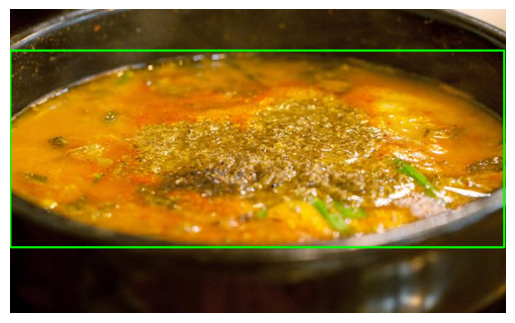

Randomly selected image: Img_095_0274.jpg


In [ ]:
import os
import random
from ultralytics import YOLO
from matplotlib import pyplot as plt
import cv2

# 모델 로드
model = YOLO('/content/YOLO/m_runs/yolo_m/weights/best.pt')

# 검증 이미지 폴더 경로
val_images_dir = '/content/YOLO/yolo_dataset/val/images'

# 검증 데이터에서 랜덤으로 이미지 선택
random_image = random.choice(os.listdir(val_images_dir))

# 선택된 이미지 경로
random_image_path = os.path.join(val_images_dir, random_image)

# 선택된 이미지로 예측 수행
results = model.predict(random_image_path)

# 결과 출력
for result in results:
    # 이미지를 불러오기
    img = cv2.imread(random_image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR로 불러오므로 RGB로 변환

    # 바운딩 박스 그리기
    for box in result.boxes.xyxy:
        x1, y1, x2, y2 = [int(coord) for coord in box]  # 바운딩 박스 좌표
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # 바운딩 박스 그리기

    # 예측 결과 시각화
    plt.imshow(img)
    plt.axis('off')
    plt.show()

print(f"Randomly selected image: {random_image}")

### 13. Koreanize Matplotlib 라이브러리를 설치
시각화에서 한글 사용하기 위해

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 55.9 MB/s eta 0:00:00


### 14. 테스트 이미지로 모델 성능 확인 및 바운딩 박스 표시
새로운 테스트 이미지(객체 인식이 가능할 이미지)로 성능 확인 및 바운딩 박스 그리기


image 1/1 /content/drive/MyDrive/YOLO/test.jpg: 448x640 1 고등어구이, 74.9ms
Speed: 2.3ms preprocess, 74.9ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


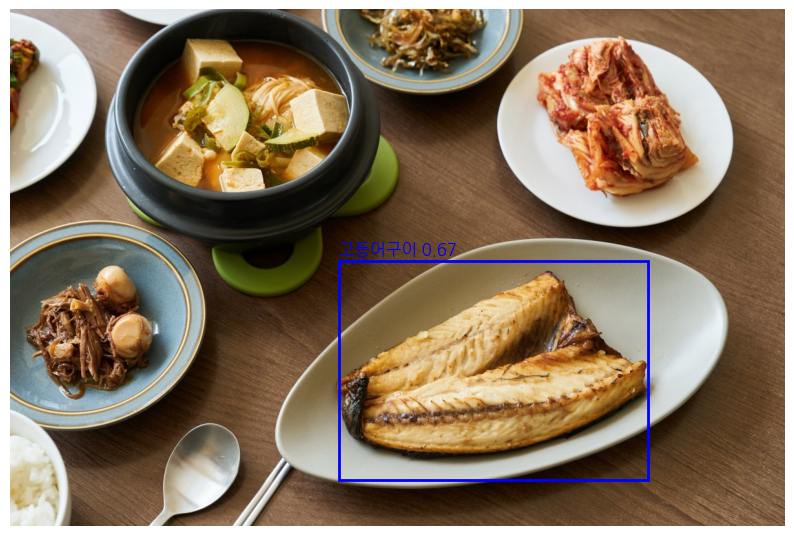

In [ ]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import koreanize_matplotlib  # 한글 폰트를 위해 필요

# 모델로드
model = YOLO('/content/YOLO/m_runs/yolo_m/weights/best.pt')

# 테스트 이미지 경로
image_path = '/content/drive/MyDrive/YOLO/test.jpg'

# 이미지를 읽어들임
image = cv2.imread(image_path)

# YOLO 모델로 추론 (객체 탐지)
results = model(image_path, conf=0.1)

# 탐지된 객체들을 순회하면서 바운딩 박스를 그리기
plt.figure(figsize=(10, 10))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR 형식이므로 RGB로 변환
plt.imshow(image_rgb)

for result in results:
    boxes = result.boxes.xyxy  # 바운딩 박스 좌표 (x1, y1, x2, y2)
    scores = result.boxes.conf  # 탐지 신뢰도
    classes = result.boxes.cls  # 클래스 레이블

    for box, score, cls in zip(boxes, scores, classes):
        x1, y1, x2, y2 = map(int, box)  # 좌표를 정수로 변환
        label = model.names[int(cls)]  # 클래스 이름

        # 바운딩 박스 그리기 (파란색)
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='blue', facecolor='none', linewidth=2))

        # 클래스 이름과 신뢰도 그리기 (한글 지원)
        plt.text(x1, y1 - 10, f'{label} {score:.2f}', color='blue', fontsize=12)

# 축 없애기
plt.axis('off')
plt.show()


image 1/1 /content/drive/MyDrive/YOLO/test6.jpg: 480x640 1 고등어구이, 1 오이소박이, 56.8ms
Speed: 2.3ms preprocess, 56.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


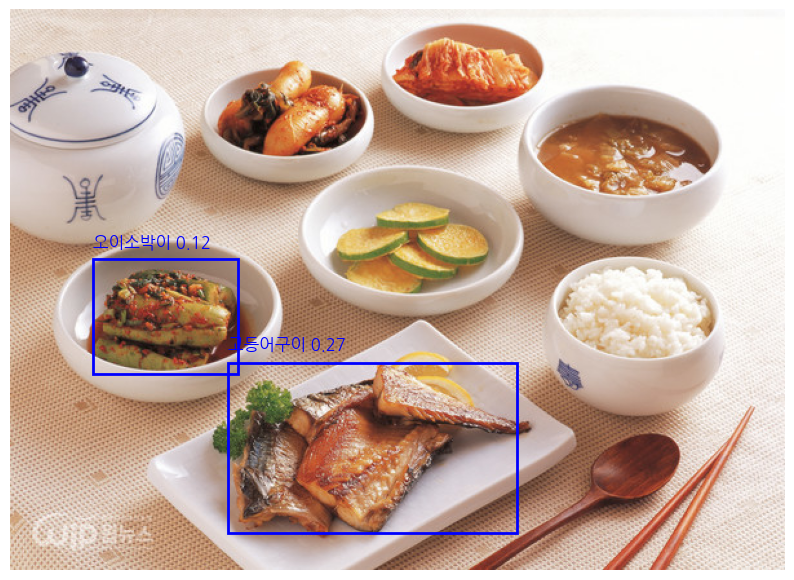

In [ ]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import koreanize_matplotlib  # 한글 폰트를 위해 필요

# 모델로드
model = YOLO('/content/YOLO/m_runs/yolo_m/weights/best.pt')

# 테스트 이미지 경로
image_path = '/content/drive/MyDrive/YOLO/test6.jpg'

# 이미지를 읽어들임
image = cv2.imread(image_path)

# YOLO 모델로 추론 (객체 탐지)
results = model(image_path, conf=0.1)

# 탐지된 객체들을 순회하면서 바운딩 박스를 그리기
plt.figure(figsize=(10, 10))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR 형식이므로 RGB로 변환
plt.imshow(image_rgb)

for result in results:
    boxes = result.boxes.xyxy  # 바운딩 박스 좌표 (x1, y1, x2, y2)
    scores = result.boxes.conf  # 탐지 신뢰도
    classes = result.boxes.cls  # 클래스 레이블

    for box, score, cls in zip(boxes, scores, classes):
        x1, y1, x2, y2 = map(int, box)  # 좌표를 정수로 변환
        label = model.names[int(cls)]  # 클래스 이름

        # 바운딩 박스 그리기 (파란색)
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='blue', facecolor='none', linewidth=2))

        # 클래스 이름과 신뢰도 그리기 (한글 지원)
        plt.text(x1, y1 - 10, f'{label} {score:.2f}', color='blue', fontsize=12)

# 축 없애기
plt.axis('off')
plt.show()

예측 수치가 낮았던 송편 테스트


image 1/1 /content/drive/MyDrive/YOLO/test5.png: 448x640 1 송편, 10.7ms
Speed: 2.2ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


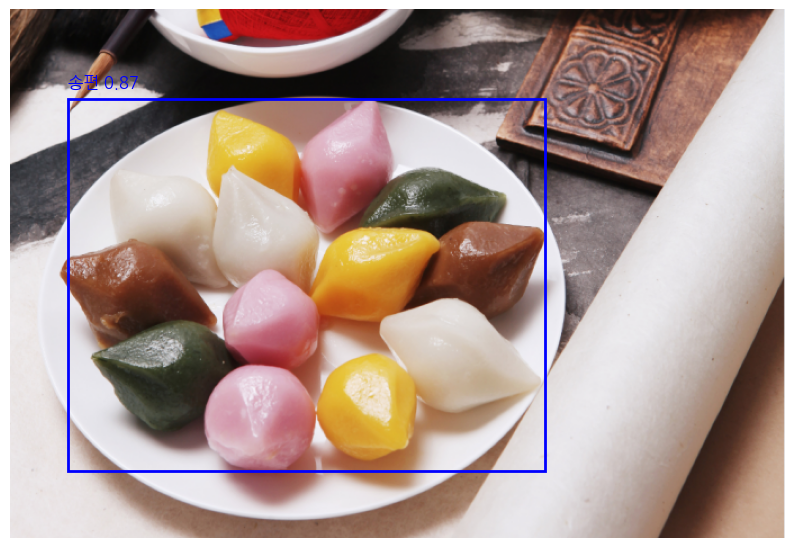

In [ ]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import koreanize_matplotlib  # 한글 폰트를 위해 필요

# 모델로드
model = YOLO('/content/YOLO/m_runs/yolo_m/weights/best.pt')

# 테스트 이미지 경로
image_path = '/content/drive/MyDrive/YOLO/test5.png'

# 이미지를 읽어들임
image = cv2.imread(image_path)

# YOLO 모델로 추론 (객체 탐지)
results = model(image_path, conf=0.1)

# 탐지된 객체들을 순회하면서 바운딩 박스를 그리기
plt.figure(figsize=(10, 10))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR 형식이므로 RGB로 변환
plt.imshow(image_rgb)

for result in results:
    boxes = result.boxes.xyxy  # 바운딩 박스 좌표 (x1, y1, x2, y2)
    scores = result.boxes.conf  # 탐지 신뢰도
    classes = result.boxes.cls  # 클래스 레이블

    for box, score, cls in zip(boxes, scores, classes):
        x1, y1, x2, y2 = map(int, box)  # 좌표를 정수로 변환
        label = model.names[int(cls)]  # 클래스 이름

        # 바운딩 박스 그리기 (파란색)
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='blue', facecolor='none', linewidth=2))

        # 클래스 이름과 신뢰도 그리기 (한글 지원)
        plt.text(x1, y1 - 10, f'{label} {score:.2f}', color='blue', fontsize=12)

# 축 없애기
plt.axis('off')
plt.show()

객체 인식이 가능한지 한사진에 두개의 잔치국수가 있는 훈련 데이터 이미지 사용


image 1/1 /content/YOLO/yolo_dataset/train/images/Img_038_0155.jpg: 640x480 2 잔치국수s, 55.2ms
Speed: 2.4ms preprocess, 55.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


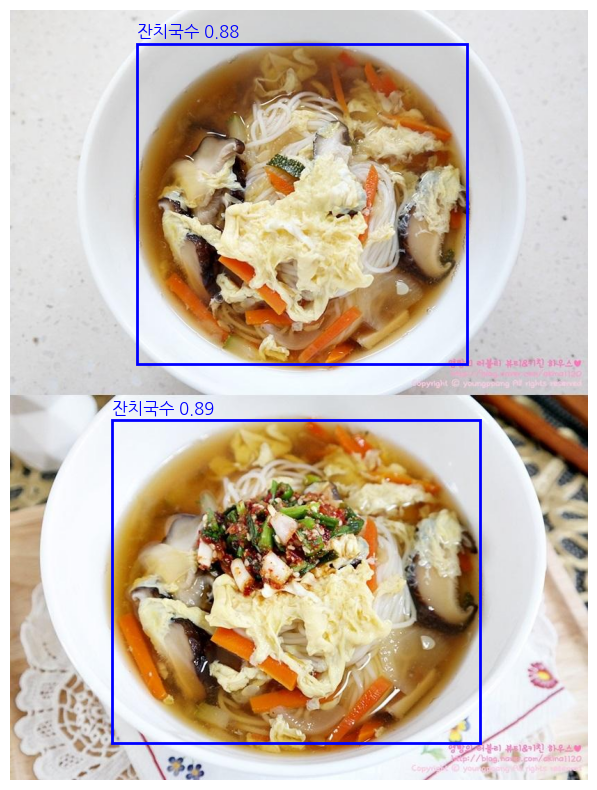

In [ ]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import koreanize_matplotlib  # 한글 폰트를 위해 필요

# 모델로드
model = YOLO('/content/YOLO/m_runs/yolo_m/weights/best.pt')

# 테스트 이미지 경로
image_path = '/content/YOLO/yolo_dataset/train/images/Img_038_0155.jpg'

# 이미지를 읽어들임
image = cv2.imread(image_path)

# YOLO 모델로 추론 (객체 탐지)
results = model(image_path, conf=0.1)

# 탐지된 객체들을 순회하면서 바운딩 박스를 그리기
plt.figure(figsize=(10, 10))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR 형식이므로 RGB로 변환
plt.imshow(image_rgb)

for result in results:
    boxes = result.boxes.xyxy  # 바운딩 박스 좌표 (x1, y1, x2, y2)
    scores = result.boxes.conf  # 탐지 신뢰도
    classes = result.boxes.cls  # 클래스 레이블

    for box, score, cls in zip(boxes, scores, classes):
        x1, y1, x2, y2 = map(int, box)  # 좌표를 정수로 변환
        label = model.names[int(cls)]  # 클래스 이름

        # 바운딩 박스 그리기 (파란색)
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='blue', facecolor='none', linewidth=2))

        # 클래스 이름과 신뢰도 그리기 (한글 지원)
        plt.text(x1, y1 - 10, f'{label} {score:.2f}', color='blue', fontsize=12)

# 축 없애기
plt.axis('off')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

image 1/1 /content/drive/MyDrive/YOLO/test/test16.jpg: 544x640 1 고사리나물, 57.8ms
Speed: 2.7ms preprocess, 57.8ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)


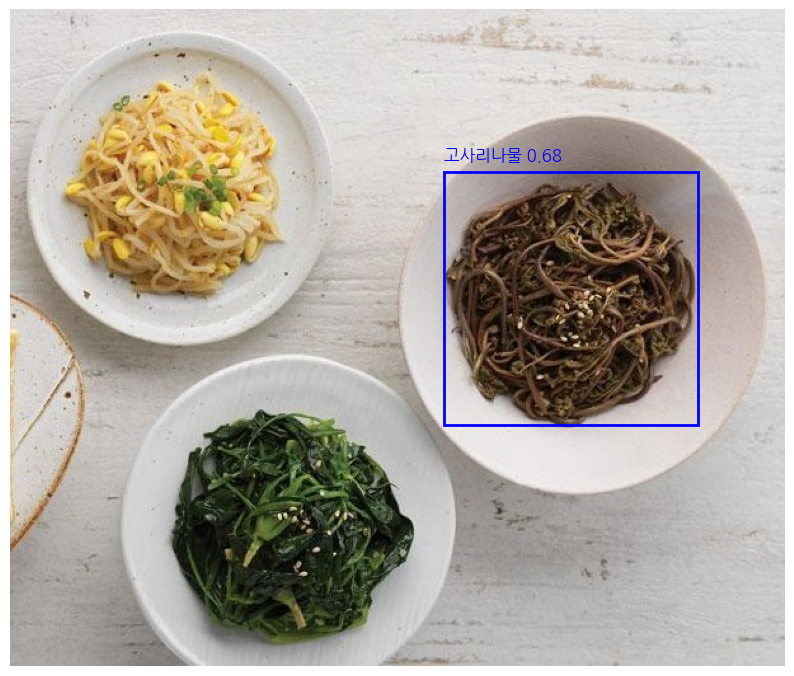

In [ ]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import koreanize_matplotlib  # 한글 폰트를 위해 필요

from google.colab import drive
drive.mount('/content/drive')

# 모델로드
model = YOLO('/content/YOLO/m_runs/yolo_m/weights/best.pt')

# 테스트 이미지 경로
image_path = '/content/drive/MyDrive/YOLO/test/test16.jpg'

# 이미지를 읽어들임
image = cv2.imread(image_path)

# YOLO 모델로 추론 (객체 탐지)
results = model(image_path, conf=0.1)

# 탐지된 객체들을 순회하면서 바운딩 박스를 그리기
plt.figure(figsize=(10, 10))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR 형식이므로 RGB로 변환
plt.imshow(image_rgb)

for result in results:
    boxes = result.boxes.xyxy  # 바운딩 박스 좌표 (x1, y1, x2, y2)
    scores = result.boxes.conf  # 탐지 신뢰도
    classes = result.boxes.cls  # 클래스 레이블

    for box, score, cls in zip(boxes, scores, classes):
        x1, y1, x2, y2 = map(int, box)  # 좌표를 정수로 변환
        label = model.names[int(cls)]  # 클래스 이름

        # 바운딩 박스 그리기 (파란색)
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='blue', facecolor='none', linewidth=2))

        # 클래스 이름과 신뢰도 그리기 (한글 지원)
        plt.text(x1, y1 - 10, f'{label} {score:.2f}', color='blue', fontsize=12)

# 축 없애기
plt.axis('off')
plt.show()

숙주나물이 파일명때문에 일치하지 않아 누락되었음, 그것 빼곤 mAP수치도 높고 객체 인식도 잘함 → 숙주나물 수정 및 더 큰 모델 사용